In [1]:
import os
os.chdir('../')

import matplotlib.pyplot as plt
from matplotlib import gridspec
import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors
import Processing.testing as testing

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r1/title_r1_test45021.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

In [3]:
pred = testing.batch_predict('./result/DeepDTA/r1/model_r1_320k_100epochs', 'r1 random_err 320k', X_drug, X_target, y, repurposing_mode=True)

Loading pre-trained model from path: ./result/DeepDTA/r1/model_r1_320k_100epochs
Drug Target Interaction Prediction Mode...
in total: 45021 drug-target pairs
encoding drug...
unique drugs: 39401
encoding protein...
unique target sequence: 2469
splitting dataset...
do not do train/test split on the data for already splitted data
predicting...
--- Finish Predicting 45021 records ---


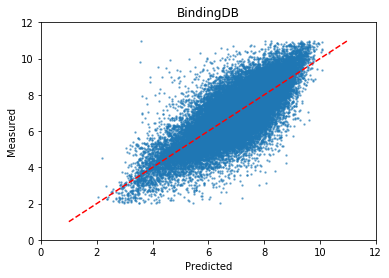

In [4]:
%matplotlib inline

plt.title('BindingDB')
plt.xlabel('Predicted')
plt.ylabel('Measured')
plt.scatter(x=pred,y=y,alpha=0.5,s=2)
xs = np.array([1,2,3,4,5,6,7,8,9,10,11])
ys = np.array([1,2,3,4,5,6,7,8,9,10,11])
plt.plot(xs, ys, linestyle = 'dashed', color = 'r')
plt.xlim([0, 12])
plt.ylim([0, 12])
plt.show()

In [5]:
pred2 = testing.batch_predict('./result/DeepDTA/r1/model_r1_320k_random_err_uniform_100epochs', 'r1 random_err_uniform 320k', X_drug, X_target, y, repurposing_mode=True)

Loading pre-trained model from path: ./result/DeepDTA/r1/model_r1_320k_random_err_uniform_100epochs
Drug Target Interaction Prediction Mode...
in total: 45021 drug-target pairs
encoding drug...
unique drugs: 39401
encoding protein...
unique target sequence: 2469
splitting dataset...
do not do train/test split on the data for already splitted data
predicting...
--- Finish Predicting 45021 records ---


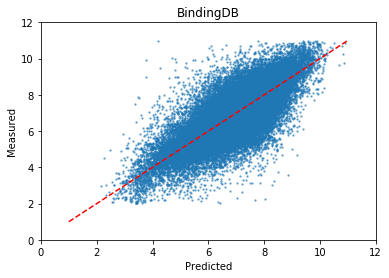

In [6]:
%matplotlib inline

plt.title('BindingDB')
plt.xlabel('Predicted')
plt.ylabel('Measured')
plt.scatter(x=pred2,y=y,alpha=0.5,s=2)
xs = np.array([1,2,3,4,5,6,7,8,9,10,11])
ys = np.array([1,2,3,4,5,6,7,8,9,10,11])
plt.plot(xs, ys, linestyle = 'dashed', color = 'r')
plt.xlim([0, 12])
plt.ylim([0, 12])
plt.show()

In [7]:
pred3 = testing.batch_predict('./result/DeepDTA/r1/model_r1_320k_random_err_uniform_2_100epochs', 'r1 random_err_uniform_2 320k', X_drug, X_target, y, repurposing_mode=True)

Loading pre-trained model from path: ./result/DeepDTA/r1/model_r1_320k_random_err_uniform_2_100epochs
Drug Target Interaction Prediction Mode...
in total: 45021 drug-target pairs
encoding drug...
unique drugs: 39401
encoding protein...
unique target sequence: 2469
splitting dataset...
do not do train/test split on the data for already splitted data
predicting...
--- Finish Predicting 45021 records ---


In [8]:
pred4 = testing.batch_predict('./result/DeepDTA/r1/model_r1_320k_random_err_uniform_3_100epochs', 'r1 random_err_uniform_3 320k', X_drug, X_target, y, repurposing_mode=True)

Loading pre-trained model from path: ./result/DeepDTA/r1/model_r1_320k_random_err_uniform_3_100epochs
Drug Target Interaction Prediction Mode...
in total: 45021 drug-target pairs
encoding drug...
unique drugs: 39401
encoding protein...
unique target sequence: 2469
splitting dataset...
do not do train/test split on the data for already splitted data
predicting...
--- Finish Predicting 45021 records ---


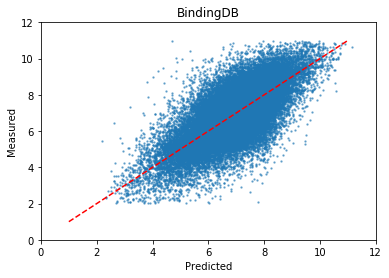

In [9]:
%matplotlib inline

plt.title('BindingDB')
plt.xlabel('Predicted')
plt.ylabel('Measured')
plt.scatter(x=pred3,y=y,alpha=0.5,s=2)
xs = np.array([1,2,3,4,5,6,7,8,9,10,11])
ys = np.array([1,2,3,4,5,6,7,8,9,10,11])
plt.plot(xs, ys, linestyle = 'dashed', color = 'r')
plt.xlim([0, 12])
plt.ylim([0, 12])
plt.show()

/home/fanf/.conda/envs/DeepPurpose/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


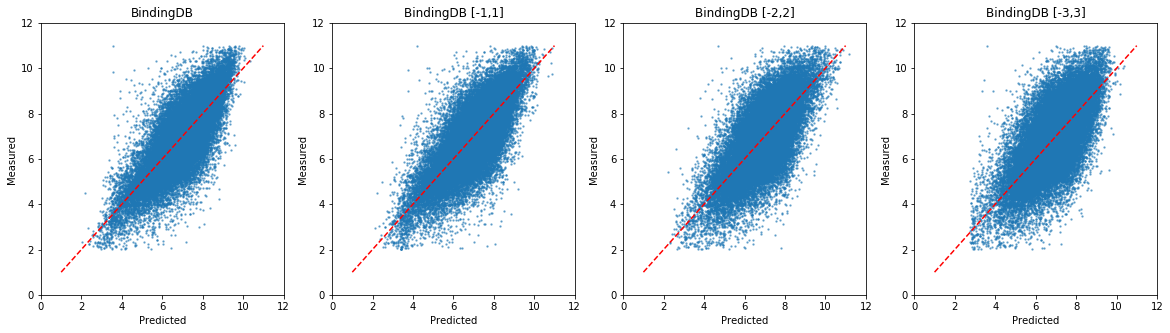

In [13]:
%matplotlib inline

xs = np.array([1,2,3,4,5,6,7,8,9,10,11])
ys = np.array([1,2,3,4,5,6,7,8,9,10,11])

fig = plt.figure(constrained_layout=True,figsize=(20,5))
spec = gridspec.GridSpec(ncols=4, nrows=1, width_ratios=[1, 1, 1, 1])
# plot1 = plt.subplot2grid((3, 9), (0, 0), colspan=3)
# plot2 = plt.subplot2grid((3, 9), (0, 3), colspan=3)
# plot3 = plt.subplot2grid((3, 9), (0, 6), colspan=3)

plot1 = fig.add_subplot(spec[0])
plot1.scatter(x=pred,y=y,alpha=0.5,s=2)
plot1.plot(xs, ys, linestyle = 'dashed', color = 'r')
plot1.axis(xmin=0,xmax=12,ymin=0,ymax=12)
plot1.set_title('BindingDB')
plot1.set_xlabel('Predicted')
plot1.set_ylabel('Measured')

plot2 = fig.add_subplot(spec[1])
plot2.scatter(x=pred2,y=y,alpha=0.5,s=2)
plot2.plot(xs, ys, linestyle = 'dashed', color = 'r')
plot2.axis(xmin=0,xmax=12,ymin=0,ymax=12)
plot2.set_title('BindingDB [-1,1]')
plot2.set_xlabel('Predicted')
plot2.set_ylabel('Measured')

plot3 = fig.add_subplot(spec[2])
plot3.scatter(x=pred3,y=y,alpha=0.5,s=2)
plot3.plot(xs, ys, linestyle = 'dashed', color = 'r')
plot3.axis(xmin=0,xmax=12,ymin=0,ymax=12)
plot3.set_title('BindingDB [-2,2]')
plot3.set_xlabel('Predicted')
plot3.set_ylabel('Measured')

plot4 = fig.add_subplot(spec[3])
plot4.scatter(x=pred4,y=y,alpha=0.5,s=2)
plot4.plot(xs, ys, linestyle = 'dashed', color = 'r')
plot4.axis(xmin=0,xmax=12,ymin=0,ymax=12)
plot4.set_title('BindingDB [-3,3]')
plot4.set_xlabel('Predicted')
plot4.set_ylabel('Measured')

# plt.tight_layout()
plt.show()

In [15]:
plt.savefig('./result/DeepDTA/scatter_plot.png')

<Figure size 432x288 with 0 Axes>